# Anomaly Detection

## Anomaly Detection of Credit Card Transactions

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import multivariate_normal
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import auc, plot_precision_recall_curve, precision_recall_curve, average_precision_score
from PIL import Image

In [2]:
# print(os.listdir("../Datasets"))
INPUT_DATASET_NAME = '1_creditcard.csv'
INPUT_PATH = f'../Datasets/{INPUT_DATASET_NAME}'

df = pd.read_csv(INPUT_PATH)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

### Percentage of Anomaly Examples

In [4]:
CONTAMINATION = df['Class'].sum()/df.shape[0]
f"Percentage of anomaly examples: {CONTAMINATION * 100} %"

'Percentage of anomaly examples: 0.1727485630620034 %'

## 1. EDA & Visualisation of Normal VS Anomal Examples
- Feature density based on classes
- Feature transformation
- Explained variance ratio for PCA
- PCA & tSNE without prior knowledge

### Analysis by Hours

Text(0.5, 1.0, 'Fraud and Normal Transactions by Hours')

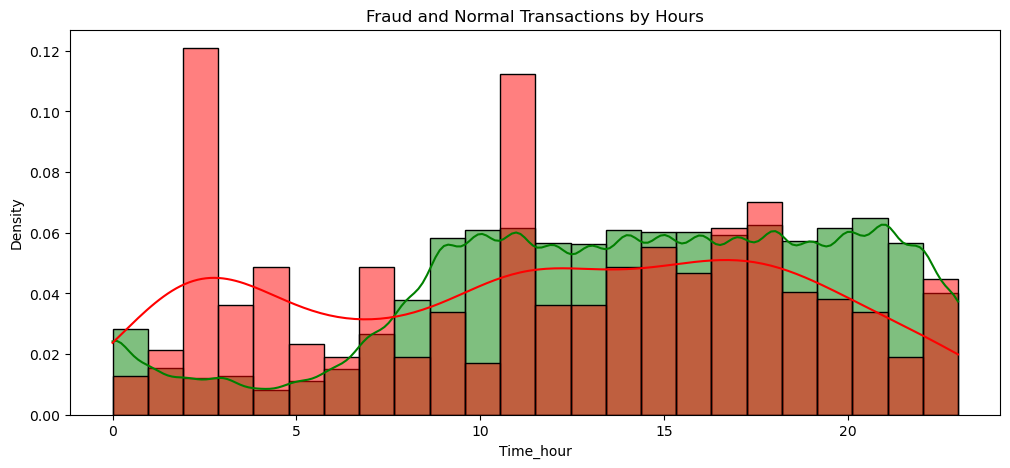

In [5]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12,5))
sns.histplot(df[df['Class'] == 0]["Time_hour"], color='g', bins=24, kde=True, stat="density")
sns.histplot(df[df['Class'] == 1]["Time_hour"], color='r', bins=24, kde=True, stat="density")
plt.title('Fraud and Normal Transactions by Hours')

(0.0, 24.0)

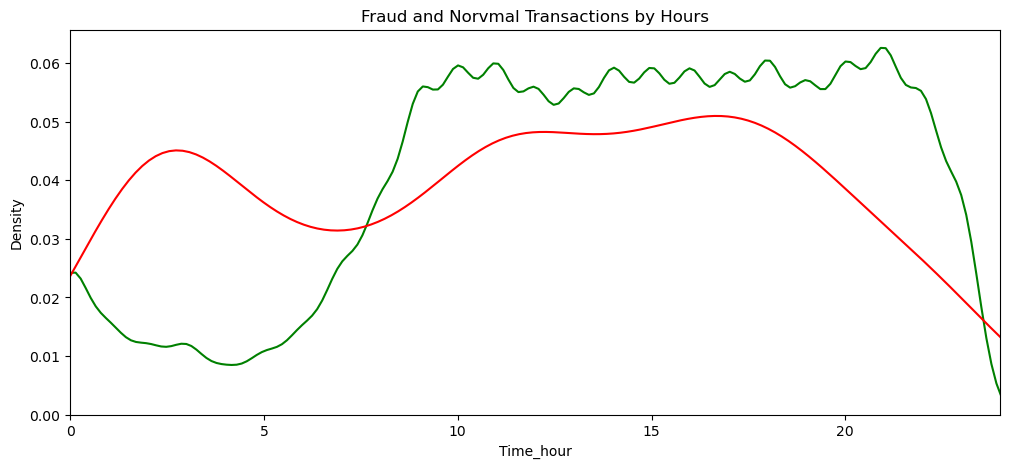

In [6]:
plt.figure(figsize=(12,5))
sns.kdeplot(df[df['Class'] == 0]["Time_hour"], color='g')
sns.kdeplot(df[df['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud and Norvmal Transactions by Hours')
plt.xlim(0, 24)

### Analysis by Amount

(0.0, 200.0)

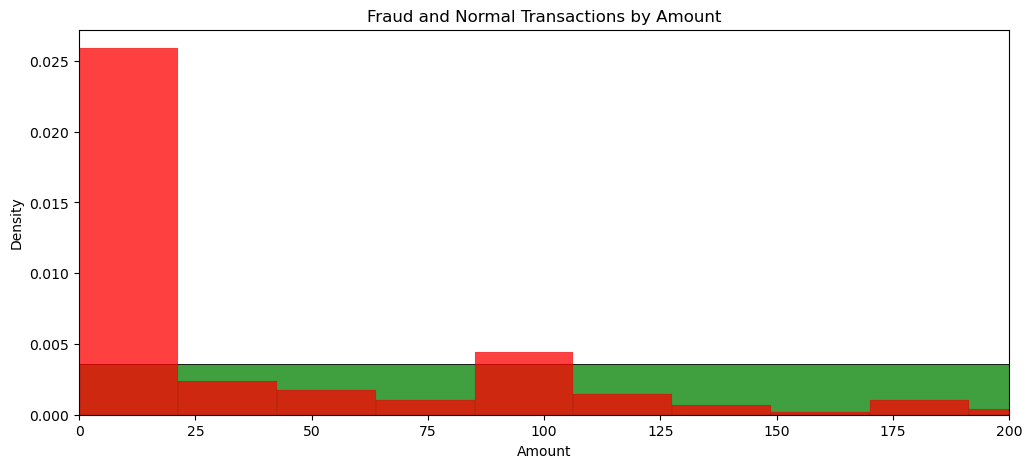

In [7]:
# df["Amount"].max(), df["Amount"].quantile(0.9)
plt.figure(figsize=(12,5))
sns.histplot(df[df['Class'] == 0]["Amount"], color='g', stat="density", bins=100)
sns.histplot(df[df['Class'] == 1]["Amount"], color='r', stat="density", bins=100)
plt.title('Fraud and Normal Transactions by Amount')
plt.xlim(0, 200)

(0.0, 200.0)

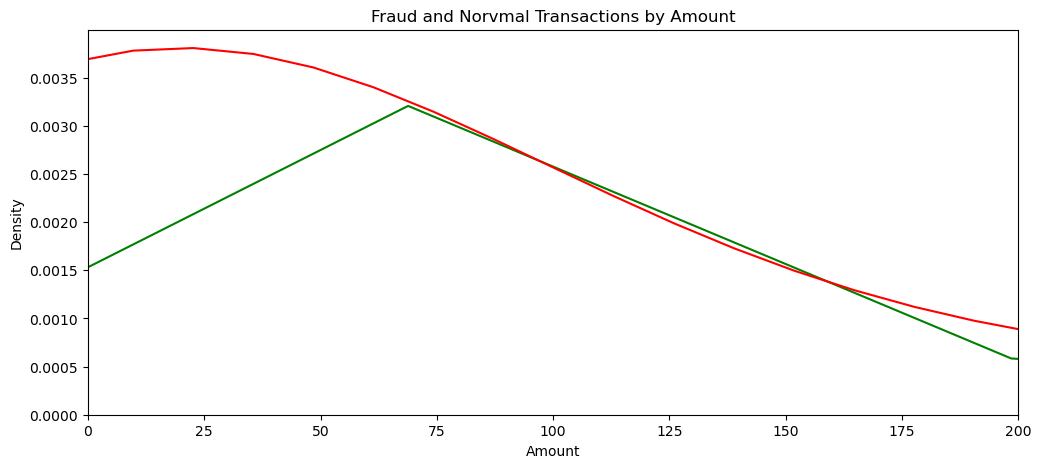

In [8]:
plt.figure(figsize=(12,5))
sns.kdeplot(df[df['Class'] == 0]["Amount"], color='g')
sns.kdeplot(df[df['Class'] == 1]["Amount"], color='r')
plt.title('Fraud and Norvmal Transactions by Amount')
plt.xlim(0, 200)

### Feature Engineering
- Scale and Transform Hours and Amount
- Use standard scaler and PCA

In [9]:
sc = StandardScaler()
df[["Time_scaled", "Amount_scaled"]] = sc.fit_transform(df[["Time", "Amount"]])
cols = df[['Time_scaled', 'Amount_scaled']]
pca = PCA()
X_PCA = pca.fit_transform(cols)

df['V29'] = X_PCA[:, 0]
df['V30'] = X_PCA[:, 1]

### Visualisation of Features Distribution

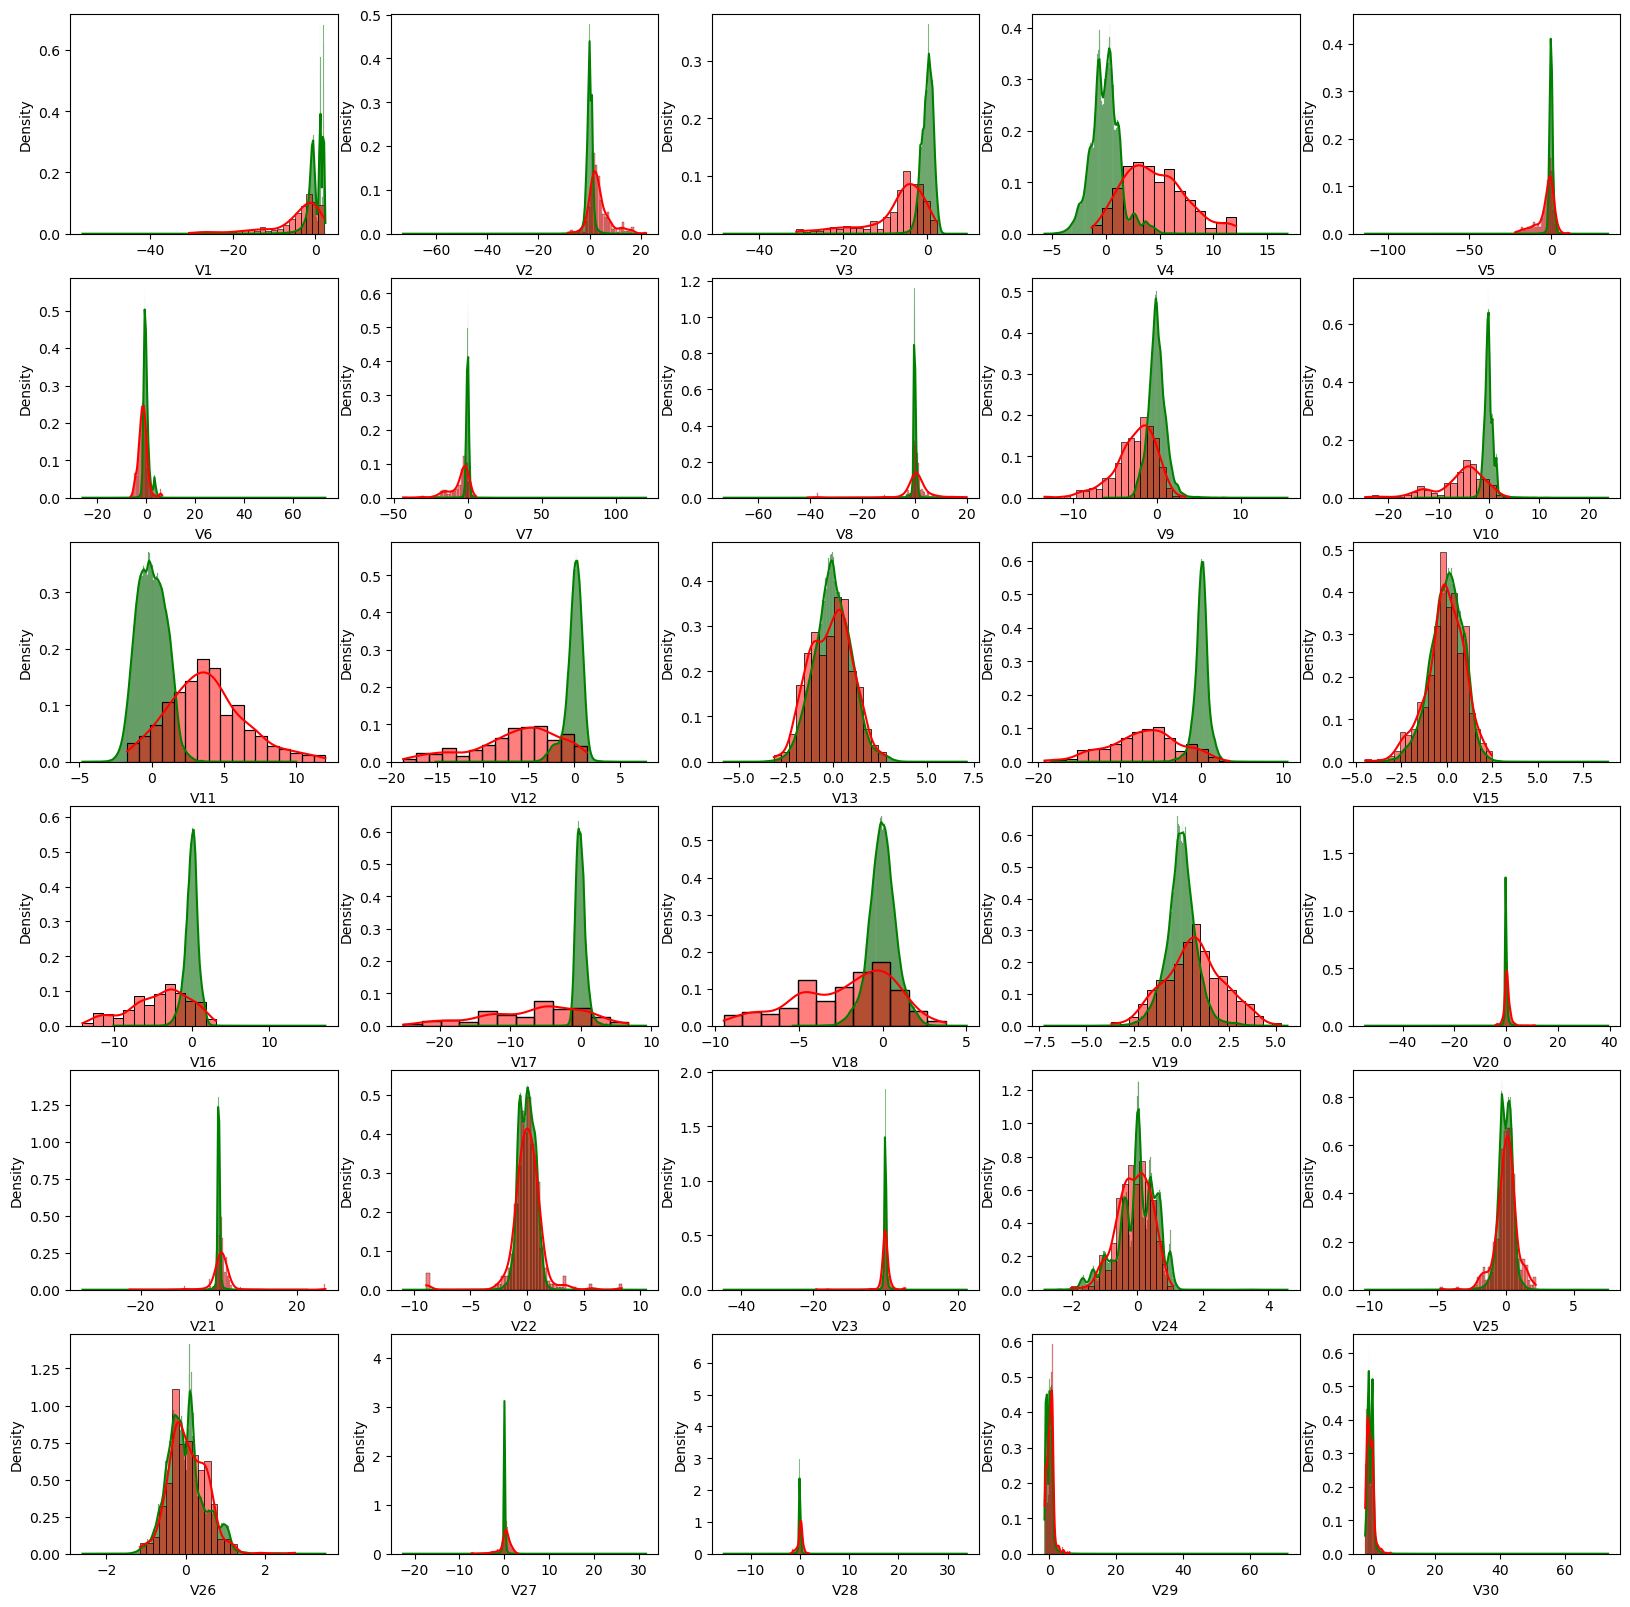

In [10]:
grid = gridspec.GridSpec(6, 5)
plt.figure(figsize=(20, 20))

for i in range(30):
    ax = plt.subplot(grid[i])
    sns.histplot(df[df['Class'] == 0][f"V{i+1}"], color='g', kde=True, stat="density")
    sns.histplot(df[df['Class'] == 1][f"V{i+1}"], color='r', kde=True, stat="density")

plt.show()

### Explained Variance Ratio

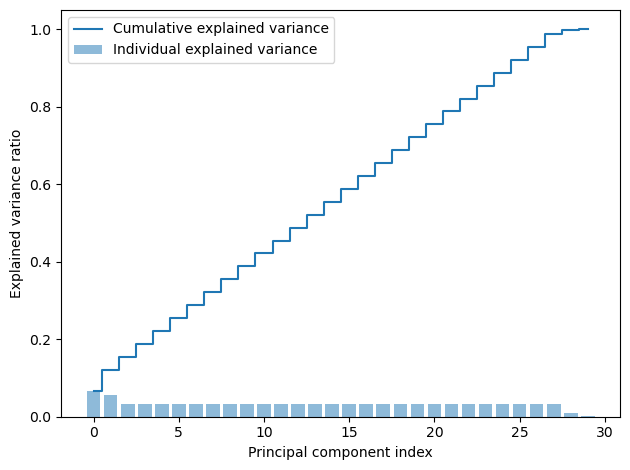

In [11]:
# models
sc = StandardScaler()
pca = PCA()

# prepare data to transform
cols_variables = [f'V{i+1}' for i in range(30)]
X_train = df[cols_variables]

# transform SC and PCA
X_train_sc = sc.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_sc)

# compute explained variance ratio
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Visualisation of Features Dependencies
- showing dependencies between first five variables

Number of pairs is: 10


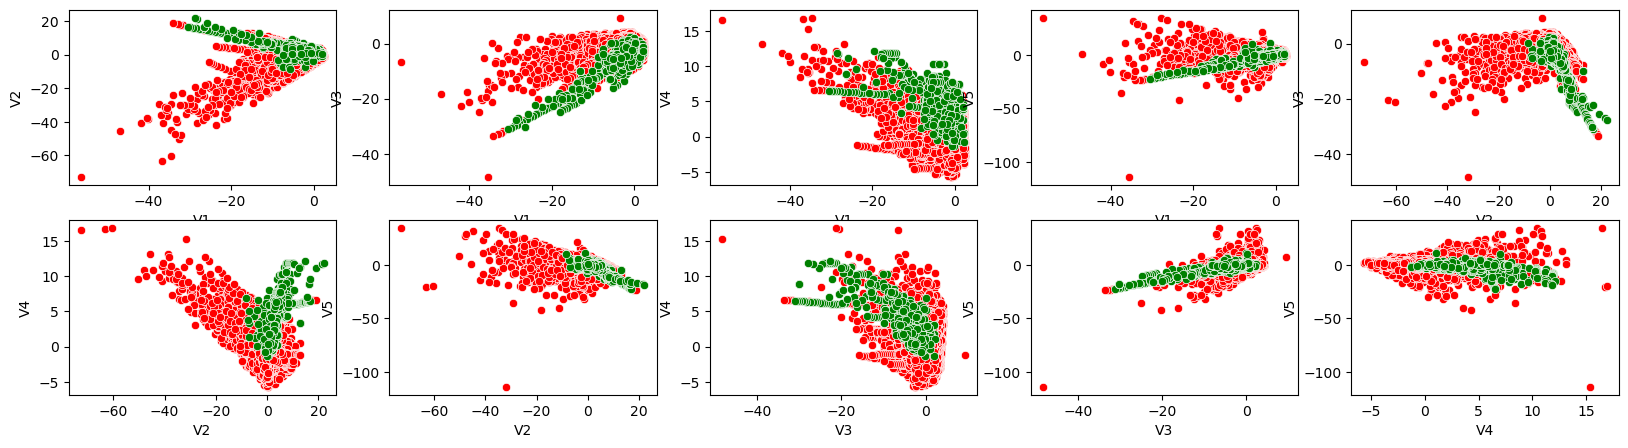

In [12]:
LIMIT_SHOW = 5
cols_variables_sample = cols_variables[:LIMIT_SHOW]

num_images = LIMIT_SHOW * (LIMIT_SHOW - 1) // 2
print(f'Number of pairs is: {num_images}')
grid = gridspec.GridSpec(2, 5)
plt.figure(figsize=(20, 5))

grid_index = 0
for i in range(LIMIT_SHOW):
    for j in range(i+1, LIMIT_SHOW):
        col1 = cols_variables_sample[i]
        col2 = cols_variables_sample[j]
        ax = plt.subplot(grid[grid_index])
        sns.scatterplot(data=df[df["Class"]== 0], x=col1, y=col2, color='r')
        sns.scatterplot(data=df[df["Class"]== 1], x=col1, y=col2, color='g')
        grid_index += 1

plt.show()

### PCA of all features

<Axes: xlabel='pca_1', ylabel='pca_2'>

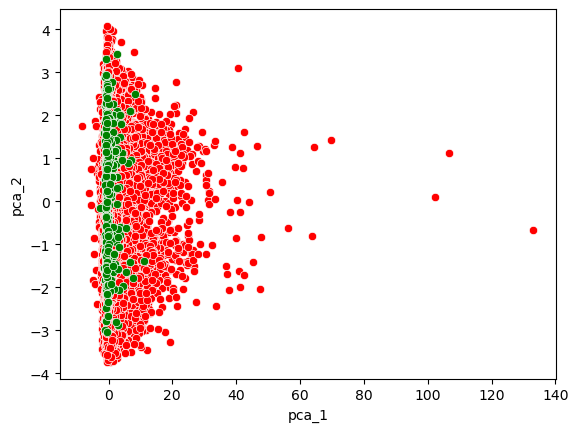

In [13]:
targets = df["Class"].to_numpy().reshape(-1, 1)
pca_n2 = PCA(n_components=2)
X_train_pca_n2 = pca_n2.fit_transform(X_train_sc)
result_np = np.concatenate((X_train_pca_n2, targets), axis=1)
result_df = pd.DataFrame(result_np, columns=['pca_1', 'pca_2', 'target'])

sns.scatterplot(data=result_df[result_df["target"]== 0], x="pca_1", y="pca_2", color='r')
sns.scatterplot(data=result_df[result_df["target"]== 1], x="pca_1", y="pca_2", color='g')

### tSNE of all features

/anaconda/envs/an_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.001s...
[t-SNE] Computed neighbors for 50000 samples in 36.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

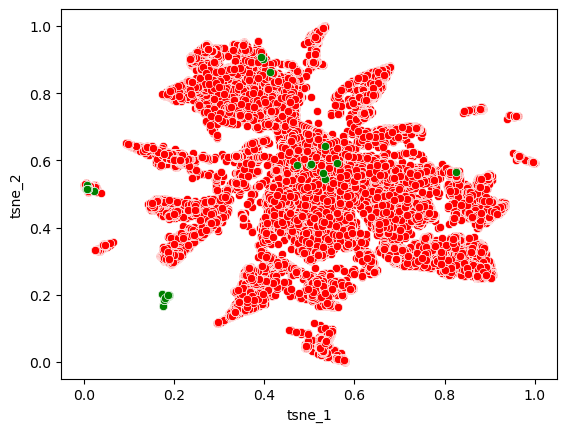

In [14]:
LIMIT_TSNE = 50000

tsne = TSNE(n_components=2, learning_rate=100, perplexity=30, angle=0.2, verbose=2, n_iter=300, n_iter_without_progress=50, random_state=42).fit_transform(X_train_sc[:LIMIT_TSNE])
tx, ty = tsne[:, 0], tsne[:, 1]
tx = (tx - np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty - np.min(ty)) / (np.max(ty) - np.min(ty))

result_np = np.concatenate((tx.reshape(-1, 1), ty.reshape(-1, 1), targets[:LIMIT_TSNE]), axis=1)
result_df = pd.DataFrame(result_np, columns=['tsne_1', 'tsne_2', 'target'])

sns.scatterplot(data=result_df[result_df["target"]== 0], x="tsne_1", y="tsne_2", color='r')
sns.scatterplot(data=result_df[result_df["target"]== 1], x="tsne_1", y="tsne_2", color='g')

## 2. Features Selection
- in a case we know targets (if not, we use all variables)
- Z-test - hypothesis testing - we assume that we know variance of data
- figure out if the values of fraud transactions are significantly different from normal transaction or not for all features
- H0: There is no difference (insignificant)
- H1: There is a difference (significant)

In [15]:
def ztest(column):
    
    mean = normal[column].mean()
    std = fraud[column].std()
    z_score = (fraud[column].mean() - mean) / (std / np.sqrt(len(fraud)))
    
    return z_score

normal= df[df["Class"] == 0]
fraud = df[df["Class"] == 1]
significant_features = []
critical_value = 2.58

for i in range(30):
    
    col = f'V{i+1}'
    z = ztest(col)
    
    # Reject Null hypothesis. i.e. H0
    if (abs(z) >= critical_value):  

        # print(col, " is statistically significant", abs(z)) 
        significant_features.append(col)
    else:
        
        print(col, " is NOT statistically significant", abs(z))

df_significant = df[significant_features + ["Class"]]
df_significant.head()

V8  is NOT statistically significant 1.8651861609239795
V13  is NOT statistically significant 2.1994547681416248
V15  is NOT statistically significant 1.9666598479202666
V22  is NOT statistically significant 0.208857347581906
V23  is NOT statistically significant 0.5669771556839318
V25  is NOT statistically significant 1.1552513020510355
V26  is NOT statistically significant 2.432996648454576
V30  is NOT statistically significant 2.4268318096187658


V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V9       V10       V11  ...       V17       V18       V19       V20  \
0  0.363787  0.090794 -0.551600  ...  0.207971  0.025791  0.403993  0.251412   
1 -0.255425 -0.166974  1.612727  ... -0.114805 -0.183361 -0.145783 -0.069083   
2 -1.514654  0.207643  0.624501  ...  1.109969 -0.121359 -2.261857  0.524980   
3 -1.387024 -0.054952 -0.226487  ... -0.684093  1.965775 -1.232622 -0.208038   
4  0.817739  0.753074 -0.822843  ... -0.237033 -0.038195  0.803487  0.408542   

        V21       V24       V27       V28       V29  Class  
0 -0.018307  0.066928  0.133558 -0.021053  1.585013      0  
1 -0.225775 -0.339846 -0.008983  0.014724  1.169631      0  
2  0.247998 -0.689281 -0.055353 -0.059752  2.232511      0  
3 -0.108300 -1.175575  0.062723  0.061458  1.511155      0  
4 -0.009431  0.141267  0.219422  0.215153  1.359864      0  

[5 rows x 23 columns]

## 3. Modeling

### Functions

In [16]:
def evaluate_metrics(prediction_column, print_metrics=True):

    precision, recall, thresholds = precision_recall_curve(df_significant["Class"], df_significant[prediction_column])
    auc_precision_recall = auc(recall, precision)
    f1 = f1_score(df_significant["Class"], df_significant[prediction_column])
    if print_metrics:
        print(f'AUC-PR:    {auc_precision_recall}')
        print(f'F1 score:  {f1}')

    return precision, recall, auc_precision_recall, f1


def show_precision_recall_curve(precision, recall):

    plt.plot(recall, precision)
    plt.title('Precision recall curve')
    plt.show()


def show_confusion_matrix(prediction_column):
    
    cm = confusion_matrix(df_significant["Class"], df_significant[prediction_column])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion matrix')
    plt.show()


def evaluate_results(prediction_column):

    precision, recall, auc_precision_recall, f1 = evaluate_metrics(prediction_column)
    show_precision_recall_curve(precision, recall)
    show_confusion_matrix(prediction_column)


def evaluate_metrics_all(prediction_columns):

    final_results = np.zeros(shape=(2, len(prediction_columns)))

    for i, prediction_column in enumerate(prediction_columns):

        precision, recall, auc_precision_recall, f1 = evaluate_metrics(prediction_column, print_metrics=False)
        final_results[0, i] = auc_precision_recall
        final_results[1, i] = f1

    return final_results


def show_results_all(prediction_columns):

    fig, axs = plt.subplots(2, len(prediction_columns), figsize=(25, 10))

    for i, prediction_column in enumerate(prediction_columns):

        precision, recall, auc_precision_recall, f1 = evaluate_metrics(prediction_column, print_metrics=False)

        # Precision recall curve
        axs[0, i].plot(recall, precision)
        axs[0, i].set_title(f'AUC-PR {prediction_column}')

        # Confusion matrix
        cm = confusion_matrix(df_significant["Class"], df_significant[prediction_column])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axs[1, i])
        axs[1, i].set_title(f'Confusion matrix {prediction_column}')

    plt.show()

### Split train, test, valid

In [17]:
df_significant = df[significant_features + ["Class"]]
X_train = df_significant[significant_features]
y_train = df_significant["Class"]

X_inliers = df_significant[df_significant["Class"] == 0].drop(["Class"], axis=1)
X_outliers = df_significant[df_significant["Class"] == 1].drop(["Class"], axis=1)

inliers_size = X_inliers.shape[0]
outliers_size = X_outliers.shape[0]

X_inliers_train = X_inliers[:inliers_size*60//100]
X_inliers_valid = X_inliers[(inliers_size*60//100)+1:(inliers_size*80//100)]
X_inliers_test = X_inliers[(inliers_size*80//100)+1:]

X_outliers_valid = X_outliers[:outliers_size*50//100]
X_outliers_test = X_outliers[(outliers_size*50//100)+1:]

X_valid = pd.concat([X_inliers_valid, X_outliers_valid])
X_test = pd.concat([X_inliers_test, X_outliers_test])

y_valid = (len(X_inliers_valid) * [0]) + (len(X_outliers_valid) * [1])
y_test = (len(X_inliers_test) * [0]) + (len(X_outliers_test) * [1])

print(f"Number of significant features: {df_significant.shape[1] - 1}")
print(f"Inliers: {inliers_size} Outliers: {outliers_size}")

Number of significant features: 22
Inliers: 284315 Outliers: 492


### Gaussian Mixture
- we score the different models and keep the best model (the lowest BIC)
- computed grid search and take lowest BIC: examples:
    - n=7, full: BIC 8.34 +4
    - n=10, full: BIC: -214874.071097
    - n=30, full: BIC: ?
- formula how to compute anomaly score from: https://towardsdatascience.com/understanding-anomaly-detection-in-python-using-gaussian-mixture-model-e26e5d06094b
- "This formula returns the probability that the data point was produced at random by any of the Gaussians we fit. Hence, we would want to filter out any data point which has a low probability from the above formula."

In [184]:
def gmm_bic_score(estimator, X):
    """
    Callable to pass to GridSearchCV that will use the BIC score.
    """
    # Make it negative since GridSearchCV expects a score to maximize
    return - estimator.bic(X)


param_grid = {
    "n_components": [1, 10],
    "covariance_type": ["full", "diag"],
    "max_iter": [500]
}

gm_grid_search = GridSearchCV(GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score)
gm_grid_search.fit(X_train)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['full', 'diag'], 'max_iter': [500],
                         'n_components': [1, 10]},
             scoring=<function gmm_bic_score at 0x7f82e159c5e0>)

### Show BIC based on parameters
- Bayesian information criterion

In [164]:
df_gm = pd.DataFrame(gm_grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df_gm["mean_test_score"] = -df_gm["mean_test_score"]
df_gm = df_gm.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df_gm.sort_values(by="BIC score").head()

Number of components Type of covariance     BIC score
2                   10               full -3.034117e+05
1                    5               full  3.398009e+05
0                    2               full  1.849328e+06
5                   10               diag  2.552575e+06
4                    5               diag  2.707645e+06

### Visualisation of clusters

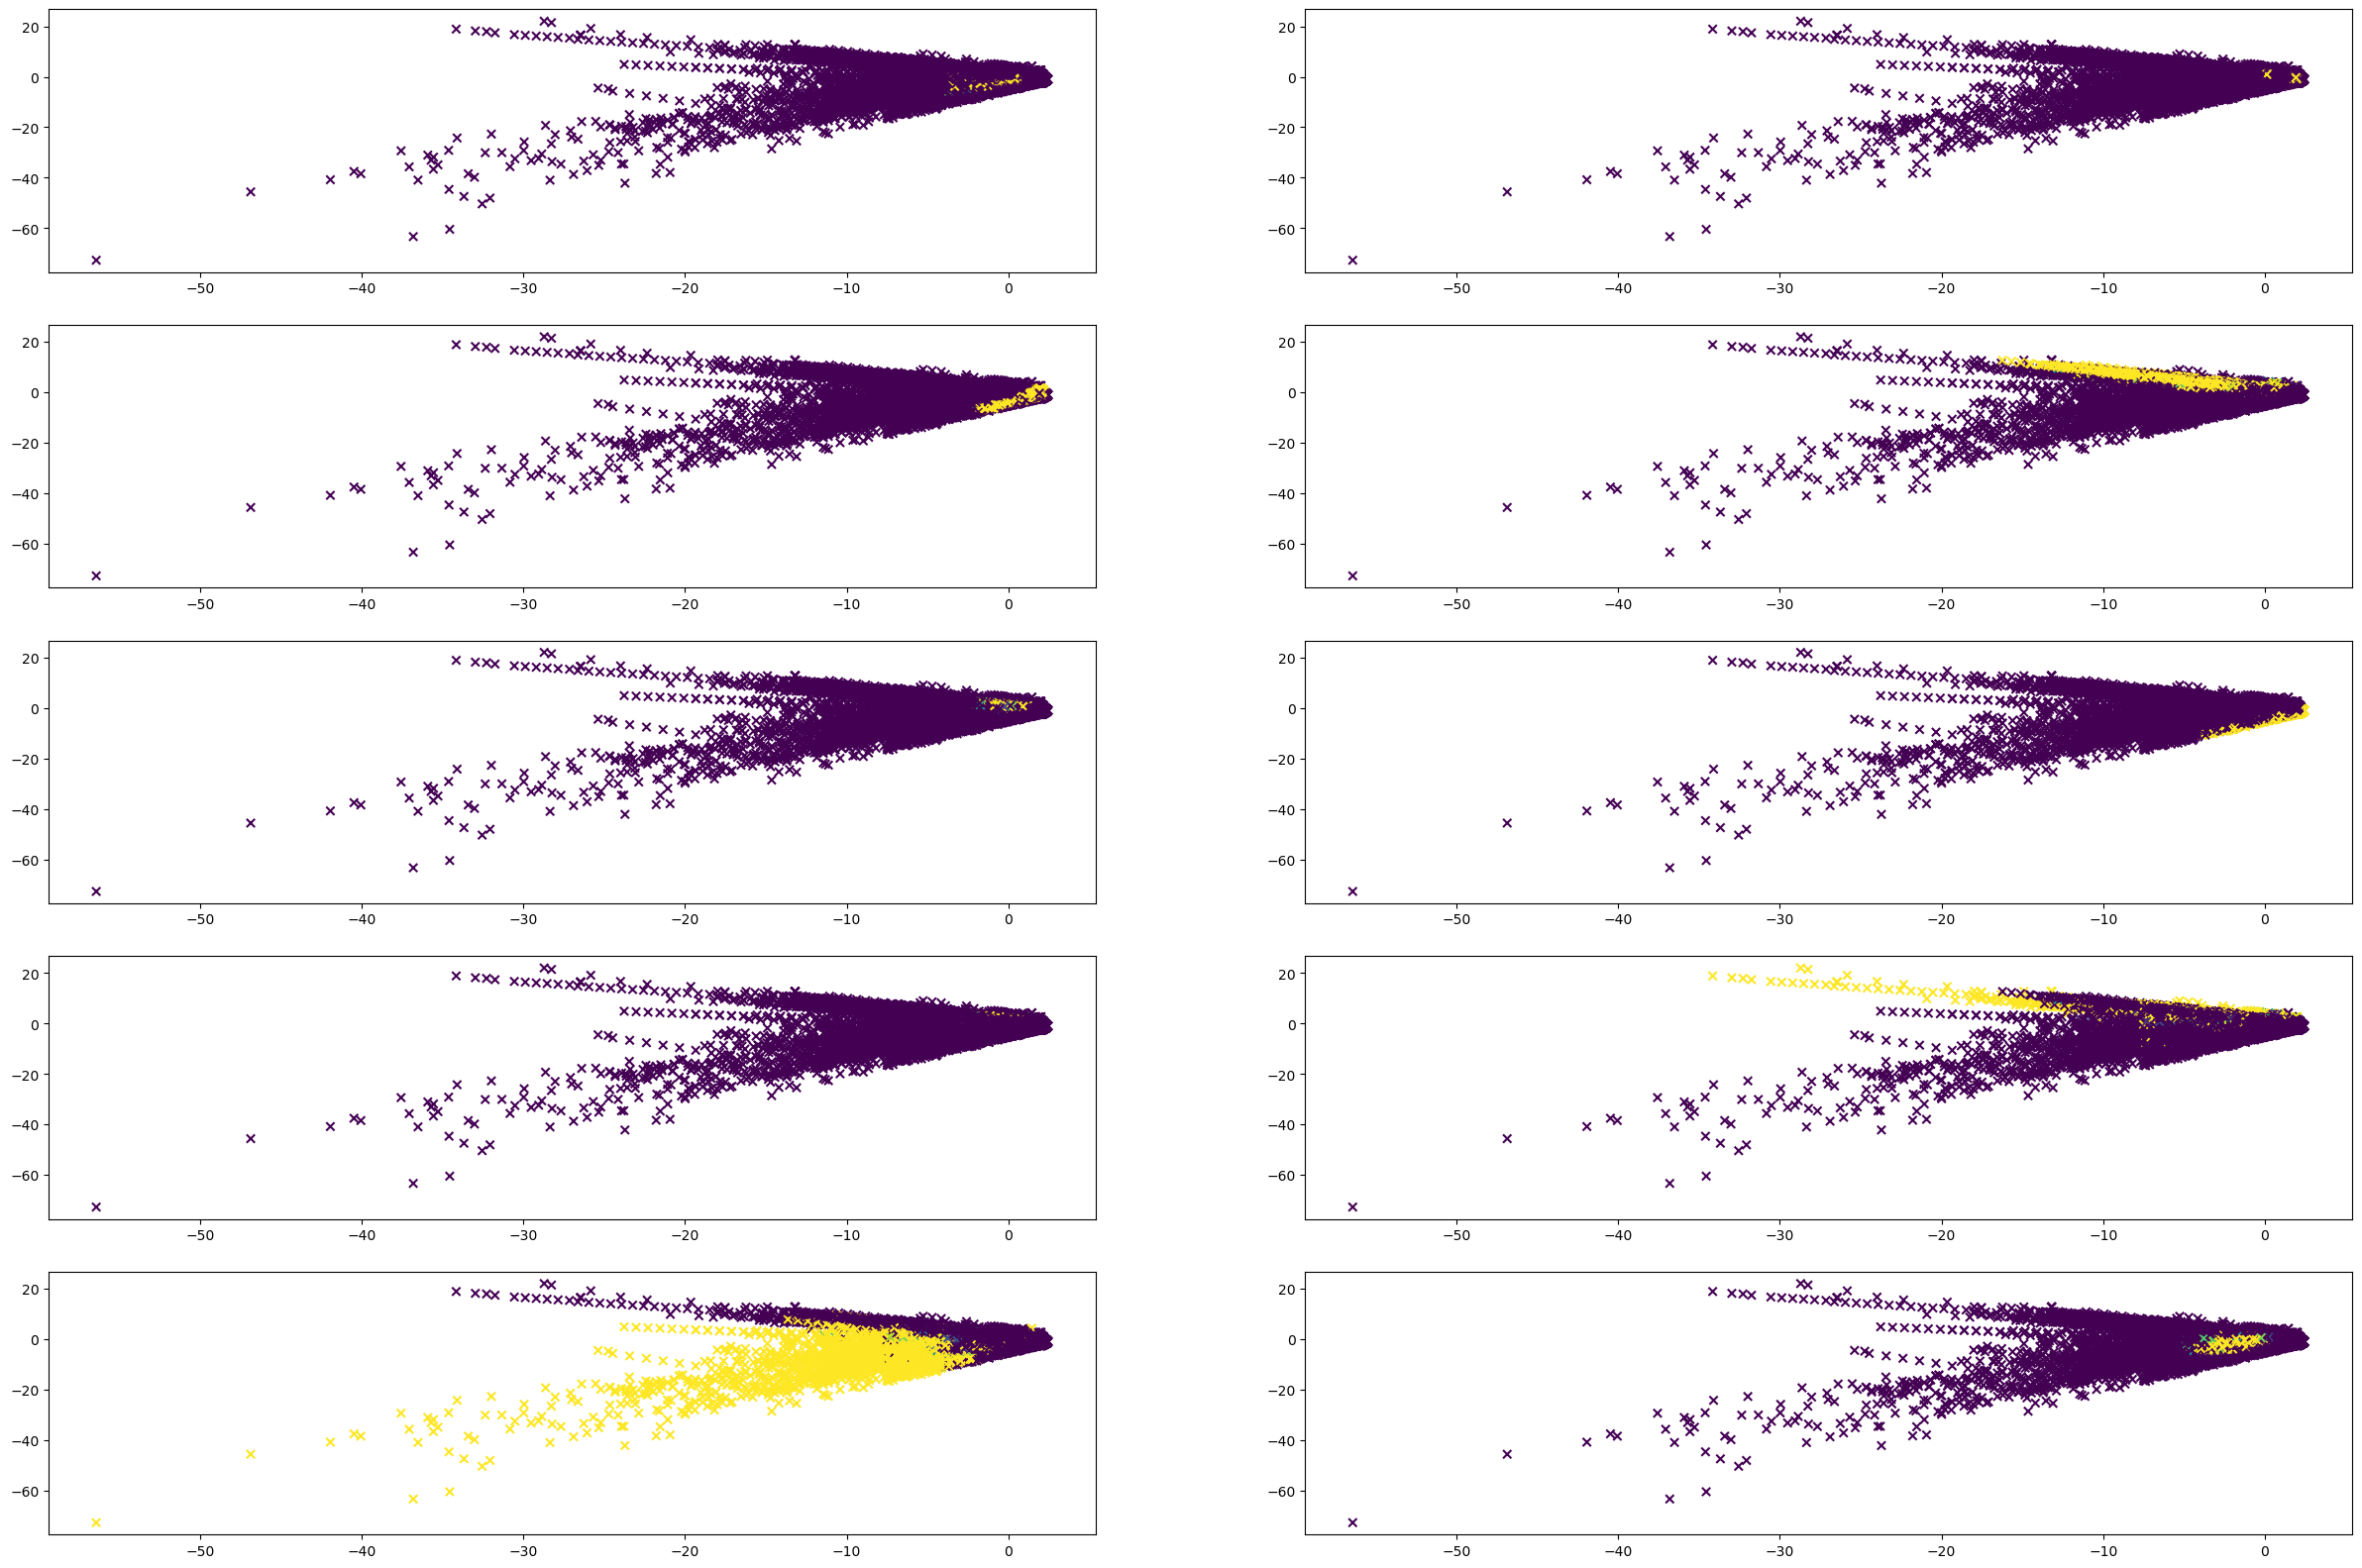

In [165]:
plt.figure(figsize=(30,20))

for i in range(10):
    
    plt.subplot(5, 2, i+1)
    plt.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=gm_grid_search.predict_proba(X_train)[:,i], cmap='viridis',marker='x')

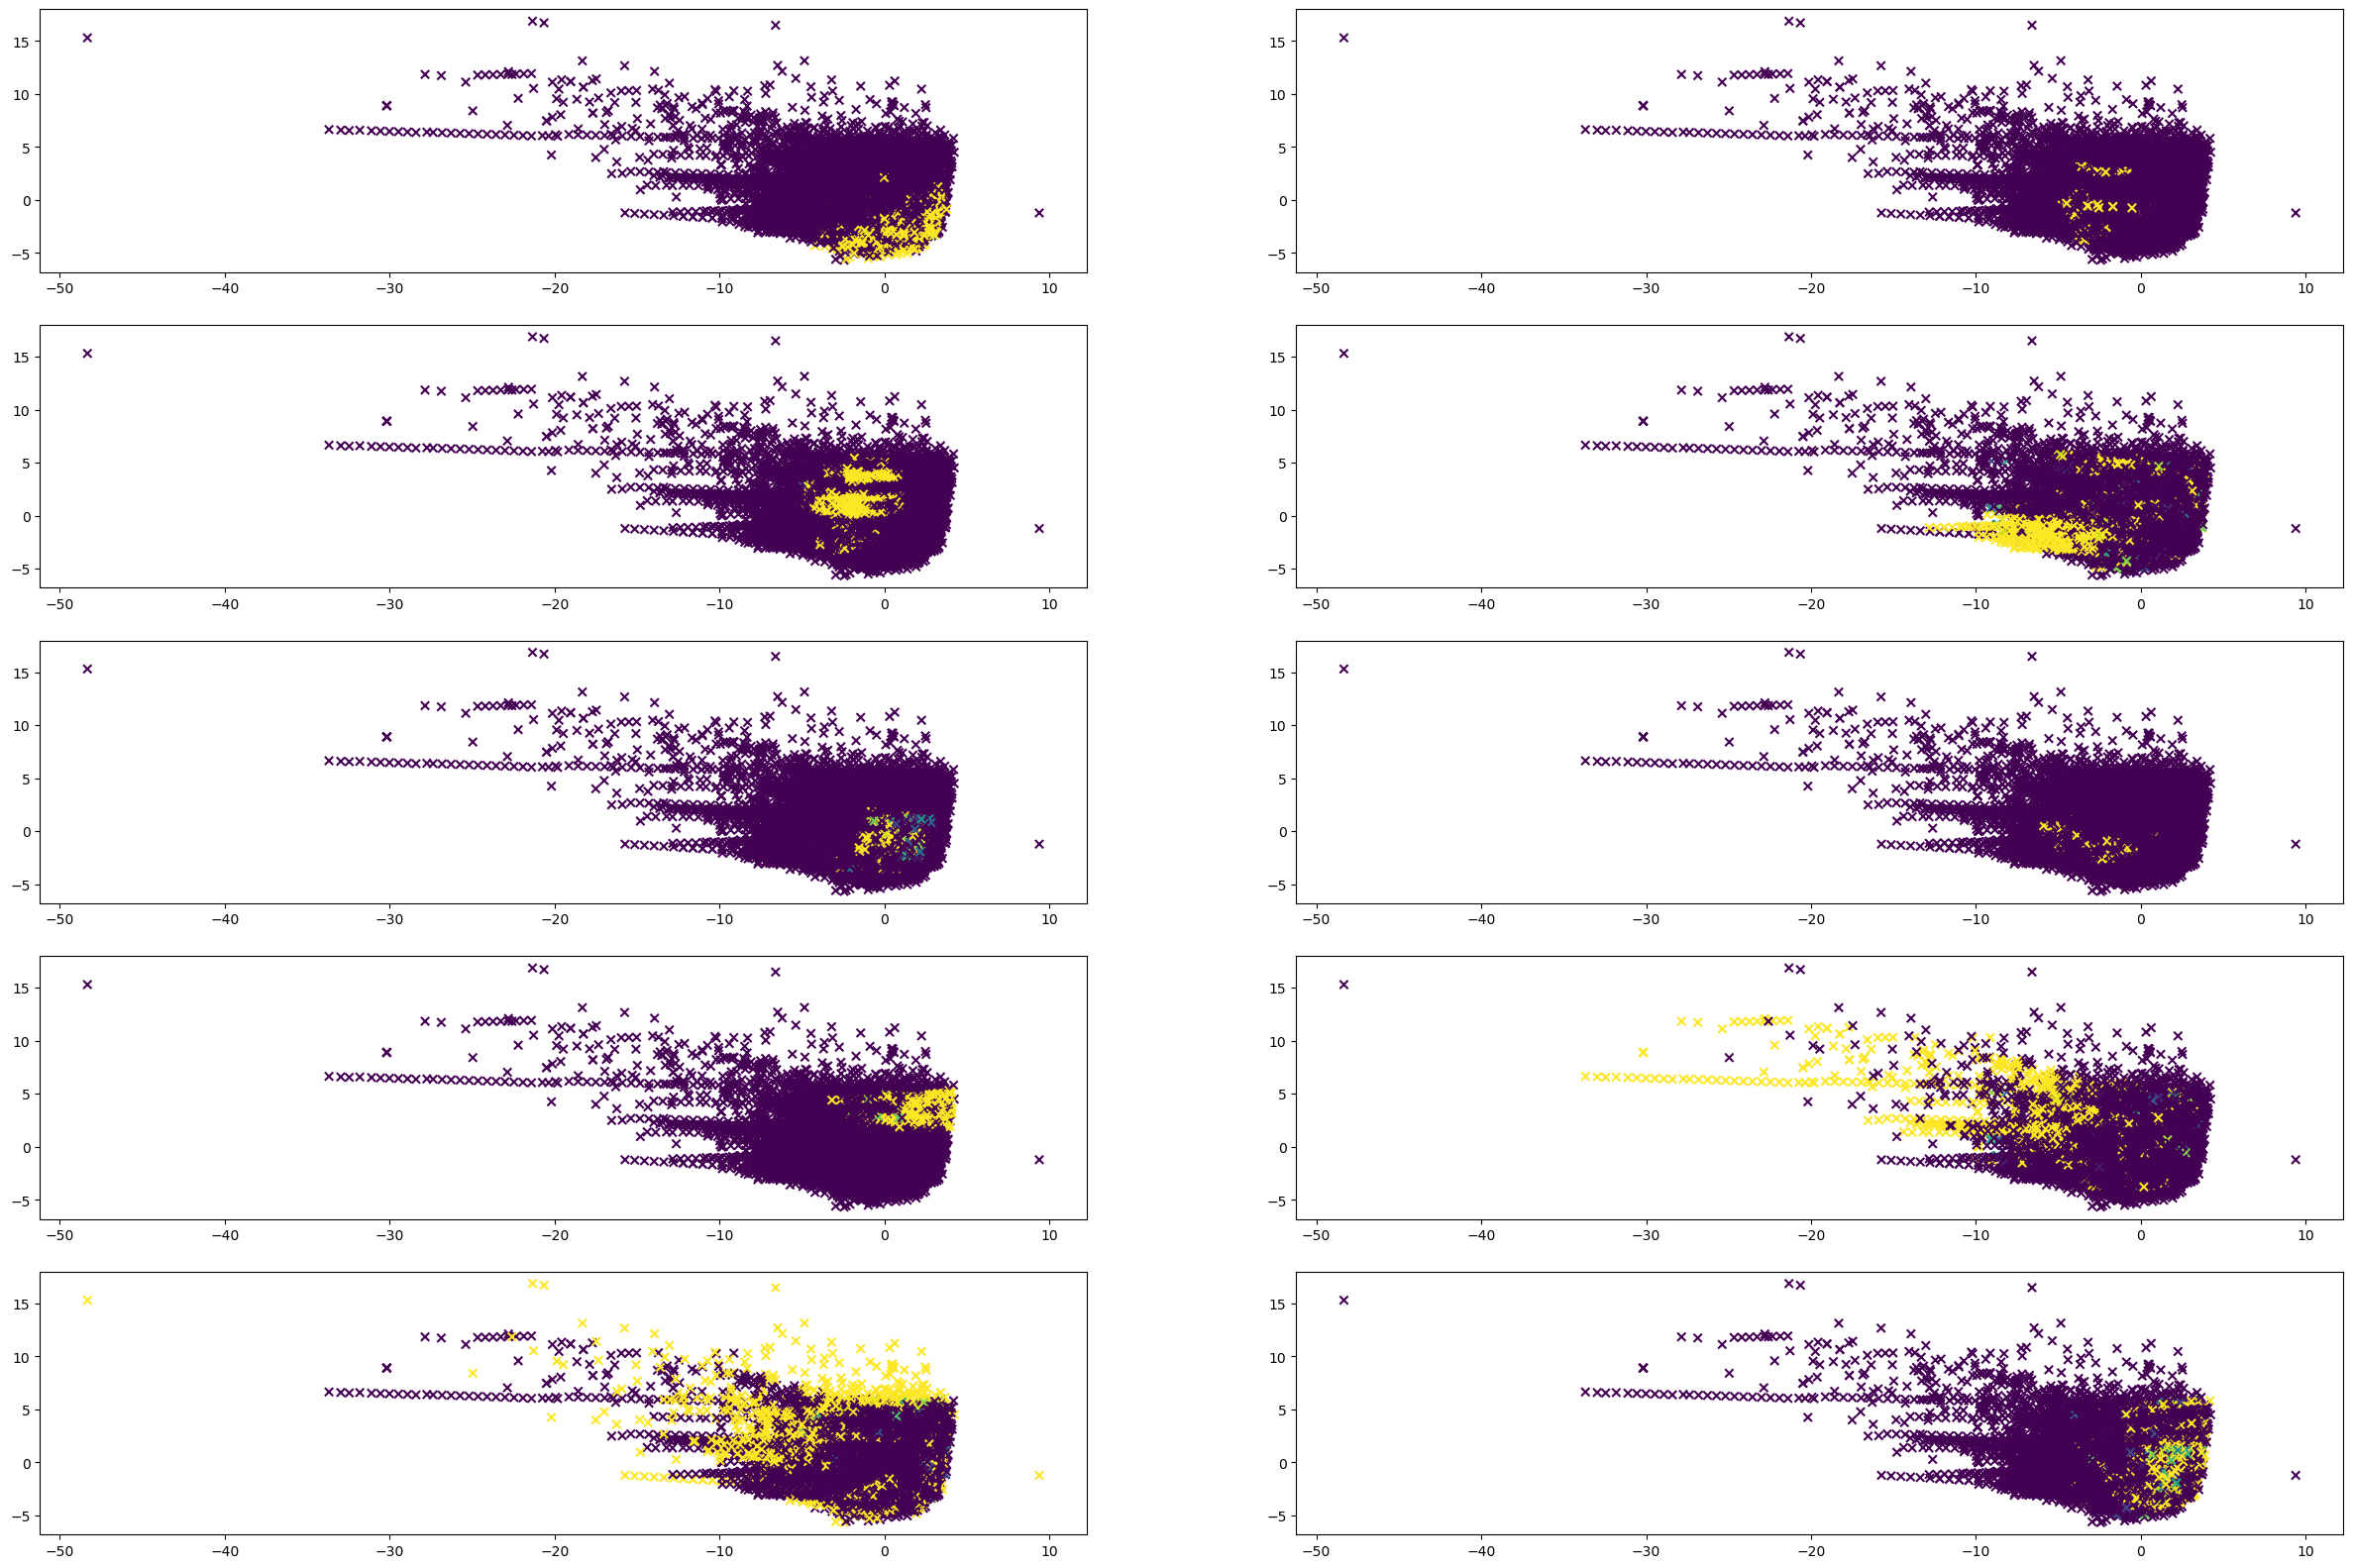

In [166]:
plt.figure(figsize=(30, 20))

for i in range(10):
    
    plt.subplot(5, 2, i+1)
    plt.scatter(X_train.to_numpy()[:, 2], X_train.to_numpy()[:, 3], c=gm_grid_search.predict_proba(X_train)[:,i], cmap='viridis',marker='x')

### Compute prediction from cluster probabilities

In [185]:
clusters_predictions = pd.DataFrame(gm_grid_search.predict_proba(X_train))

proba_complement = 1
for i in range(10):
    proba_complement = proba_complement * (1 - clusters_predictions[i])

clusters_predictions["proba"] = 1 - proba_complement
clusters_predictions

0             1              2             3              4  \
0       0.0  0.000000e+00   9.879993e-01  1.200002e-02   7.044587e-07   
1       1.0  0.000000e+00  1.131258e-272  2.864393e-72   2.098047e-23   
2       0.0  0.000000e+00   0.000000e+00  9.999277e-01  1.568588e-116   
3       0.0  0.000000e+00   0.000000e+00  9.999994e-01  4.994060e-101   
4       0.0  0.000000e+00   9.972478e-01  2.533091e-06   2.749646e-03   
...     ...           ...            ...           ...            ...   
284802  0.0  0.000000e+00   0.000000e+00  0.000000e+00   1.000000e+00   
284803  0.0  0.000000e+00   9.998444e-01  1.547308e-04   8.366764e-07   
284804  0.0  1.114058e-11   0.000000e+00  0.000000e+00   3.652201e-24   
284805  0.0  0.000000e+00   9.999755e-01  2.430606e-05   1.986102e-07   
284806  0.0  0.000000e+00   1.046391e-02  9.894791e-01   4.714723e-08   

                    5             6             7              8    9  \
0        1.863866e-08  4.786675e-11  2.331858e-12   5.951238e-47  0.0   
1        5.884829e-43  2.664977e-27  2.979413e-30  1.225219e-148  0.0   
2        7.226447e-05  1.665680e-56  2.544879e-09   0.000000e+00  0.0   
3        6.290737e-07  8.425288e-47  8.380693e-11   0.000000e+00  0.0   
4        6.165148e-12  9.294743e-09  7.736313e-10   1.053708e-36  0.0   
...               ...           ...           ...            ...  ...   
284802   0.000000e+00  8.192598e-13  3.621519e-12  1.113306e-139  0.0   
284803   8.003801e-08  2.257941e-12  2.202577e-13   9.519078e-33  0.0   
284804  2.455705e-122  4.799998e-26  4.356709e-32  1.602011e-199  1.0   
284805   1.571813e-08  1.074513e-12  1.016822e-13   4.962178e-18  0.0   
284806   5.689556e-05  1.845804e-08  3.201024e-11  2.848712e-110  0.0   

           proba  
0       0.988143  
1       1.000000  
2       0.999928  
3       0.999999  
4       0.997255  
...          ...  
284802  1.000000  
284803  0.999844  
284804  1.000000  
284805  0.999975  
284806  0.989590  

[284807 rows x 11 columns]

0.9999999999
AUC-PR:    0.06499585732329366
F1 score:  0.000870334042494405


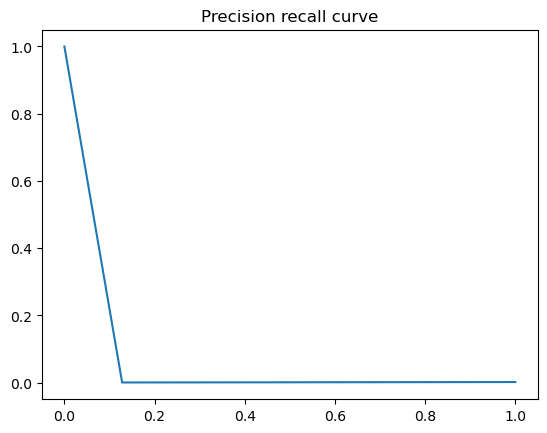

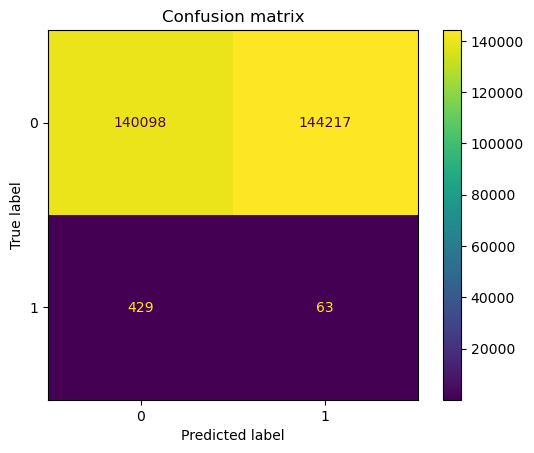

0.99999999999
AUC-PR:    0.06498894691660245
F1 score:  0.0008428770202290486


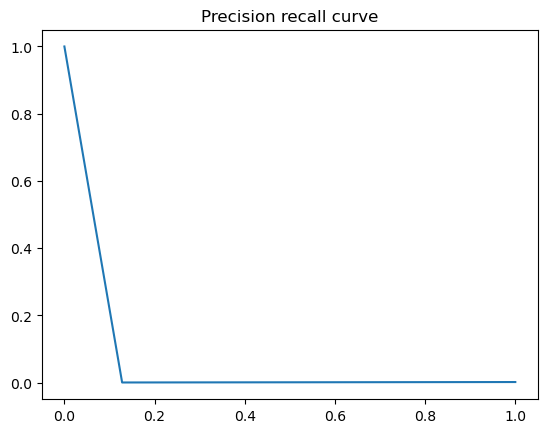

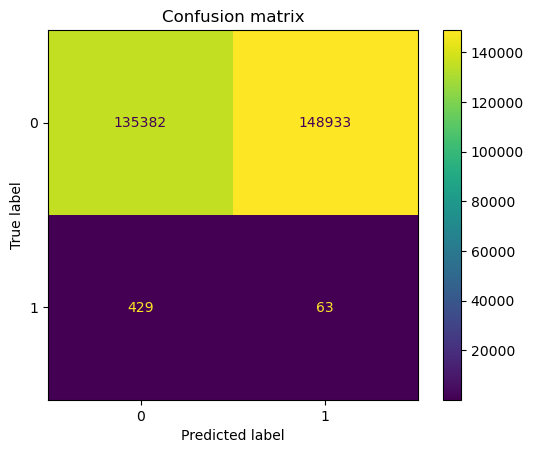

0.999999999999
AUC-PR:    0.06498503899252532
F1 score:  0.0008273471049417575


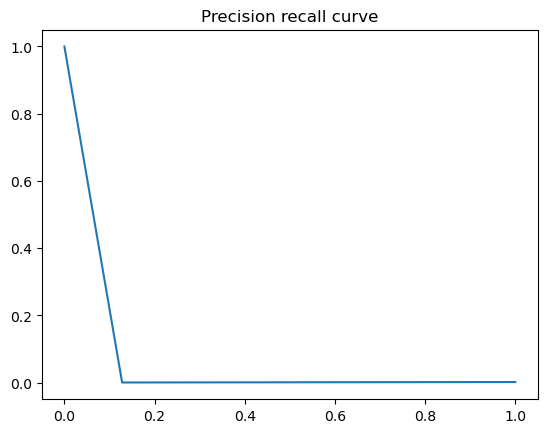

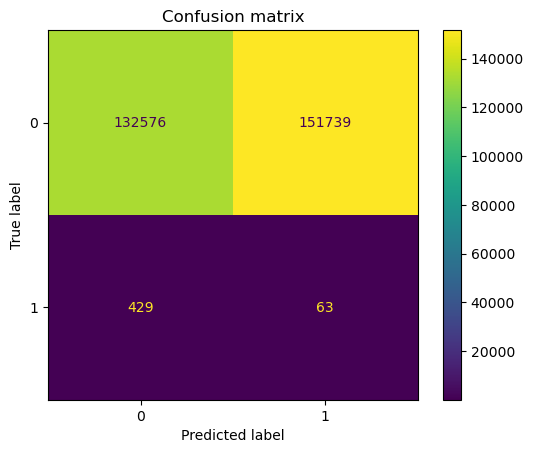

0.9999999999999
AUC-PR:    0.06498110832841857
F1 score:  0.0008117249154453212


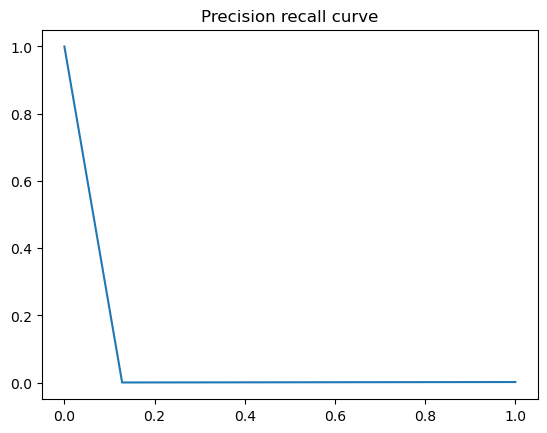

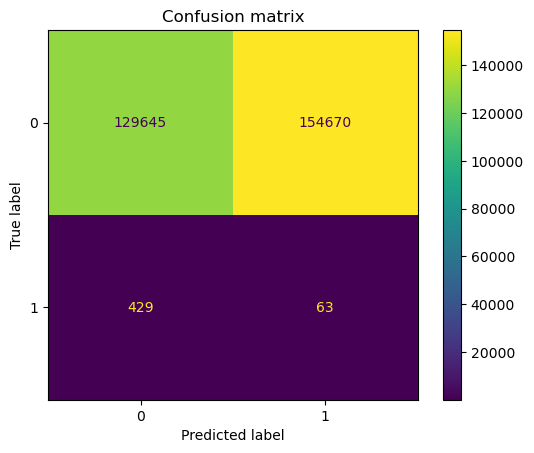

0.99999999999999
AUC-PR:    0.06599679711877897
F1 score:  0.0008164723292424668


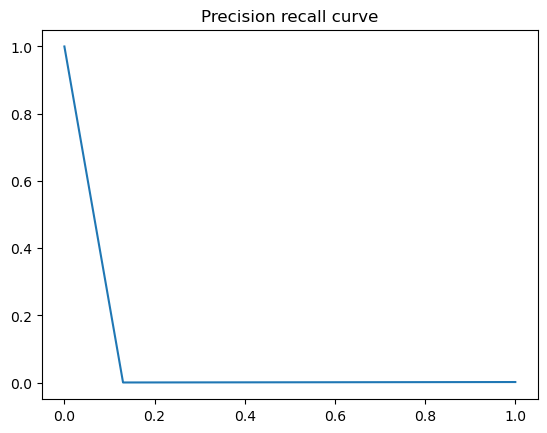

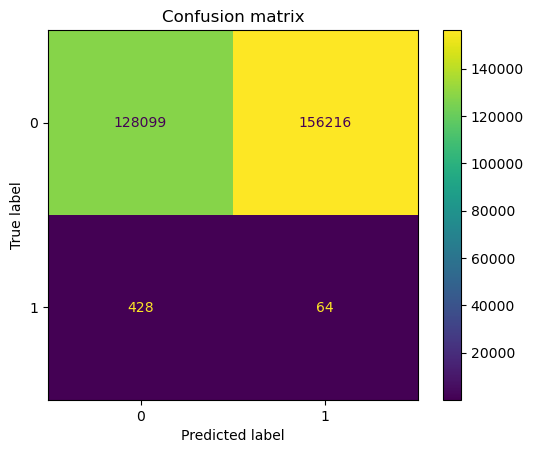

0.999999999999999
AUC-PR:    0.06599621833338132
F1 score:  0.0008141716757306872


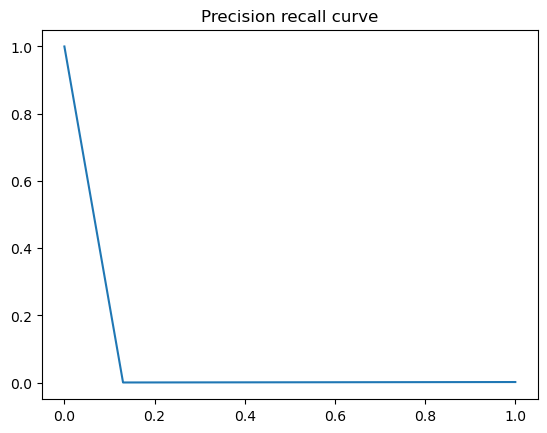

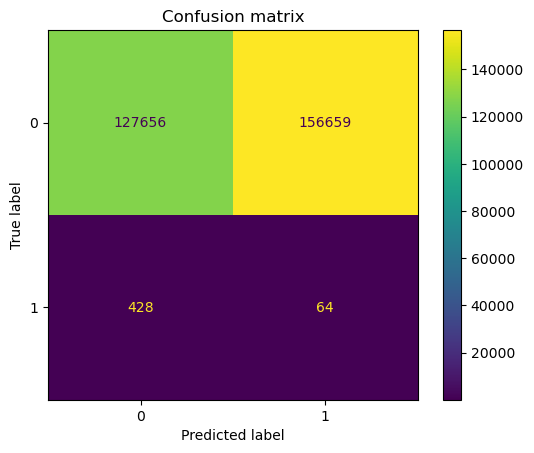

0.9999999999999999
AUC-PR:    0.06701379688913406
F1 score:  0.0008264305194433673


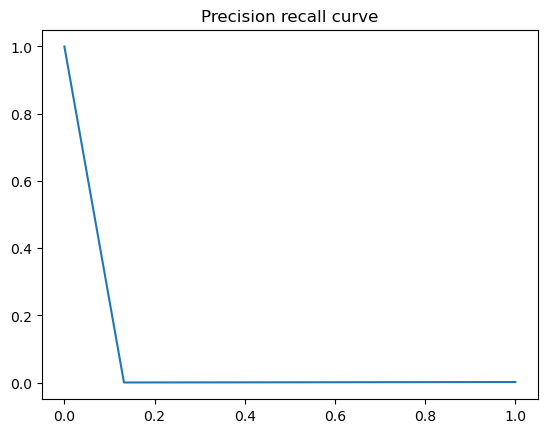

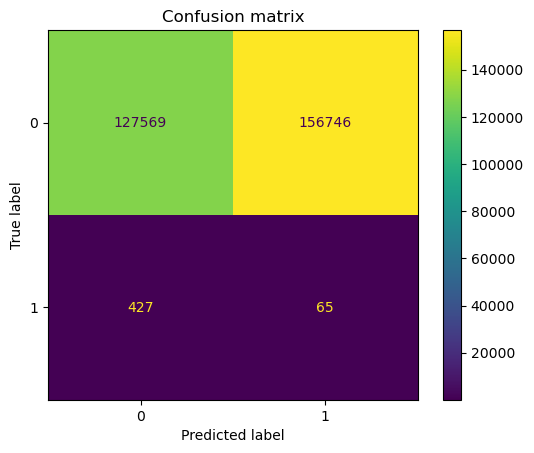

1.0
AUC-PR:    0.50086374281531
F1 score:  0.0034490131405998624


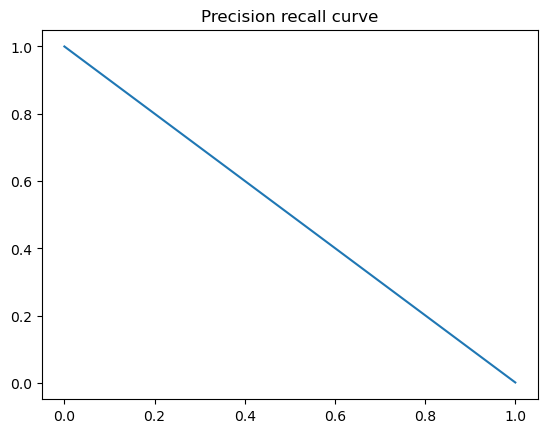

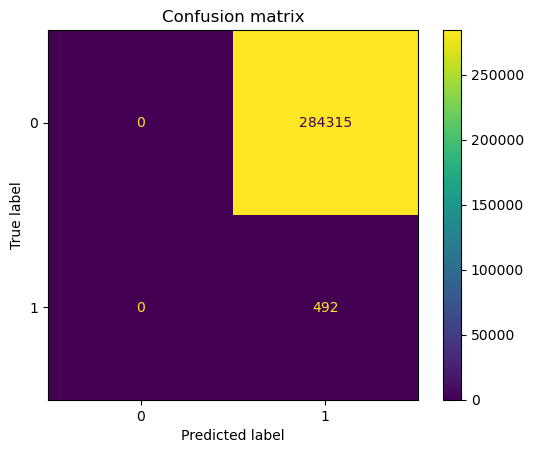

1.0
AUC-PR:    0.50086374281531
F1 score:  0.0034490131405998624


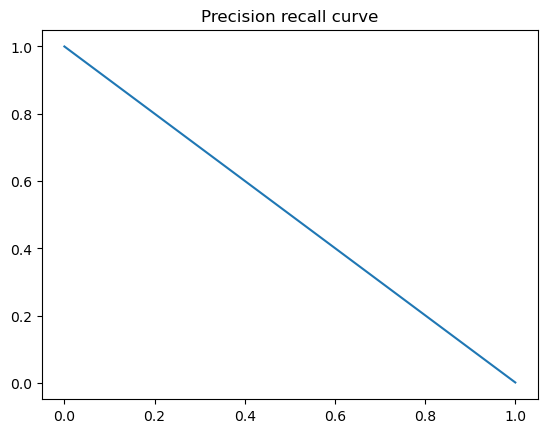

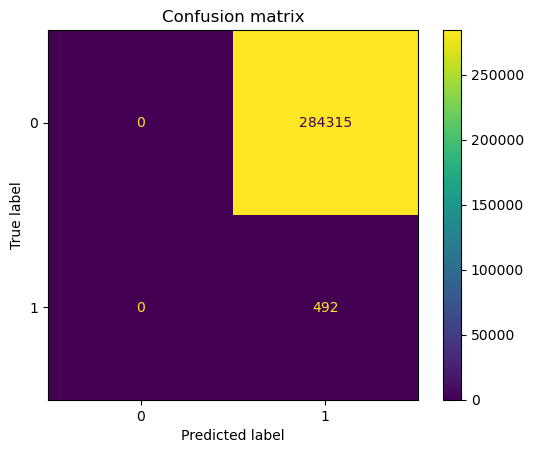

1.0
AUC-PR:    0.50086374281531
F1 score:  0.0034490131405998624


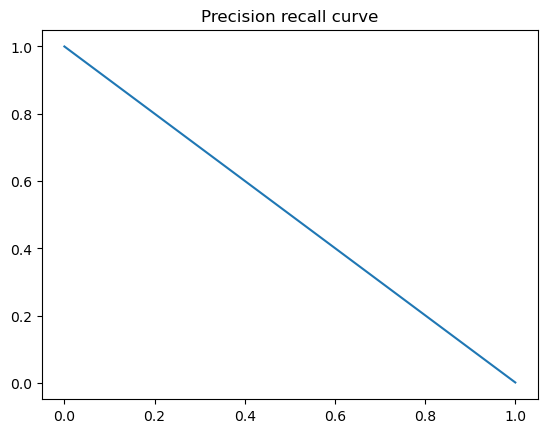

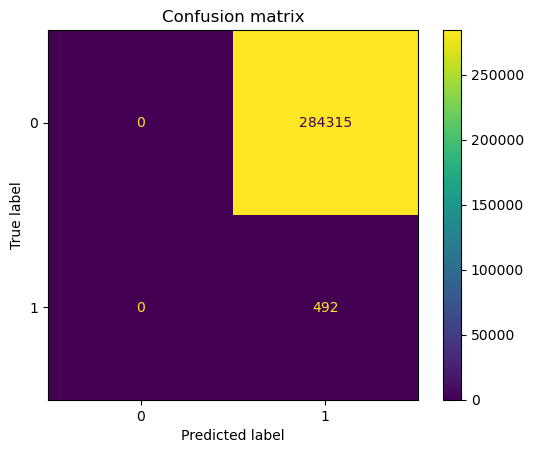

In [186]:
from decimal import *
getcontext().prec = 50

prediction_column = 'Pred_GMM'
THRESHOLDS_GMM =  [1 - 10**(-x) for x in range(10, 20)]

for thresh in THRESHOLDS_GMM:
    print(thresh)
    df_significant.loc[:, prediction_column] = (clusters_predictions["proba"] <= thresh).astype(int)
    evaluate_results(prediction_column)

### Multivariate Gaussian Probability Distribution
- check correlation matrix of inliers (not anomalous data)
- compute PDF = probability density function

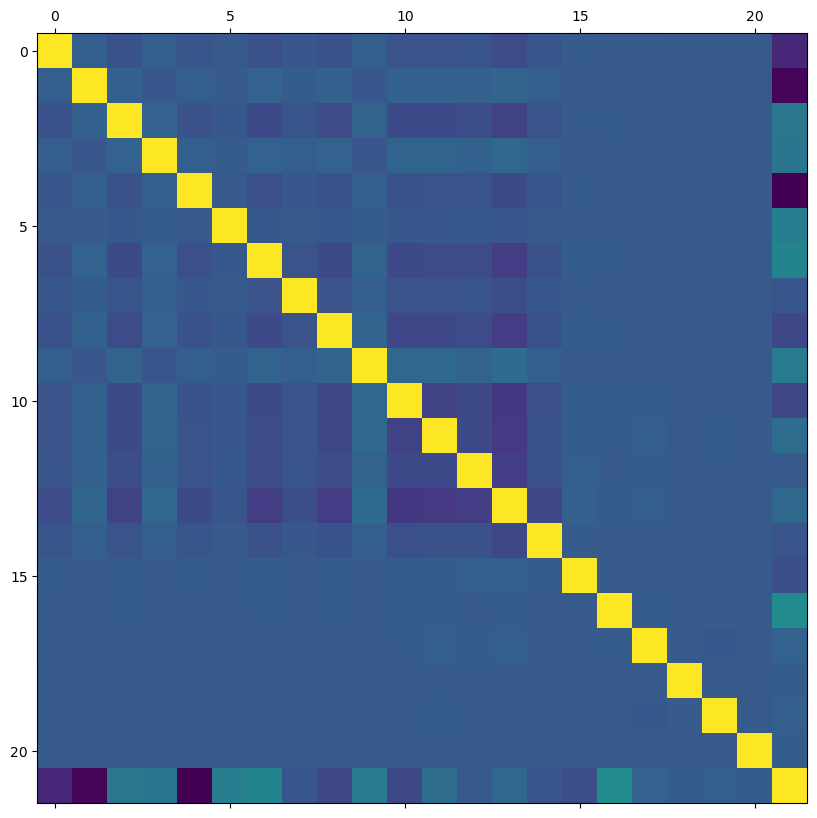

In [170]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(X_inliers.corr())
plt.show()

In [171]:
X_inliers.describe()

V1             V2             V3             V4  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean        0.008258      -0.006271       0.012171      -0.007860   
std         1.929814       1.636146       1.459429       1.399333   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.917544      -0.599473      -0.884541      -0.850077   
50%         0.020023       0.064070       0.182158      -0.022405   
75%         1.316218       0.800446       1.028372       0.737624   
max         2.454930      18.902453       9.382558      16.875344   

                  V5             V6             V7             V9  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean        0.005453       0.002419       0.009637       0.004467   
std         1.356952       1.329913       1.178812       1.089372   
min      -113.743307     -26.160506     -31.764946      -6.290730   
25%        -0.689398      -0.766847      -0.551442      -0.640412   
50%        -0.053457      -0.273123       0.041138      -0.049964   
75%         0.612181       0.399619       0.571019       0.598230   
max        34.801666      73.301626     120.589494      15.594995   

                 V10            V11  ...            V16            V17  \
count  284315.000000  284315.000000  ...  284315.000000  284315.000000   
mean        0.009824      -0.006576  ...       0.007164       0.011535   
std         1.044204       1.003112  ...       0.844772       0.749457   
min       -14.741096      -4.797473  ...     -10.115560     -17.098444   
25%        -0.532880      -0.763447  ...      -0.465543      -0.482644   
50%        -0.091872      -0.034923  ...       0.067377      -0.064833   
75%         0.455135       0.736362  ...       0.523738       0.399922   
max        23.745136      10.002190  ...      17.315112       9.253526   

                 V18            V19            V20            V21  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean        0.003887      -0.001178      -0.000644      -0.001235   
std         0.824919       0.811733       0.769404       0.716743   
min        -5.366660      -7.213527     -54.497720     -34.830382   
25%        -0.497414      -0.456366      -0.211764      -0.228509   
50%        -0.002787       0.003117      -0.062646      -0.029821   
75%         0.501103       0.457499       0.132401       0.185626   
max         5.041069       5.591971      39.420904      22.614889   

                 V24            V27            V28            V29  
count  284315.000000  284315.000000  284315.000000  284315.000000  
mean        0.000182      -0.000295      -0.000131      -0.000528  
std         0.605776       0.399847       0.329570       1.005231  
min        -2.836627     -22.565679     -15.430084      -1.410390  
25%        -0.354425      -0.070852      -0.052950      -0.750620  
50%         0.041082       0.001230       0.011199       0.024370  
75%         0.439869       0.090573       0.077962       0.561000  
max         4.584549      31.612198      33.847808      71.318112  

[8 rows x 22 columns]

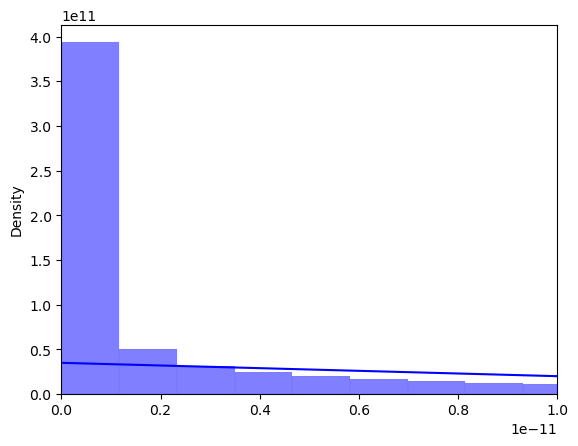

In [172]:
prediction_column = 'Pred_MG_PDF'
EPSILON = 1e-170

p = multivariate_normal(mean=np.mean(X_inliers_train, axis=0), cov=np.cov(X_inliers_train.T))
prob_density = p.pdf(X_valid)
sns.histplot(prob_density, color='b', kde=True, stat="density")
plt.xlim(0, 1e-11)

pred_valid = (prob_density < EPSILON).astype(int)

#### Evaluation on validation set

AUC-PR:    0.5820910811403142
F1 score:  0.5809128630705394


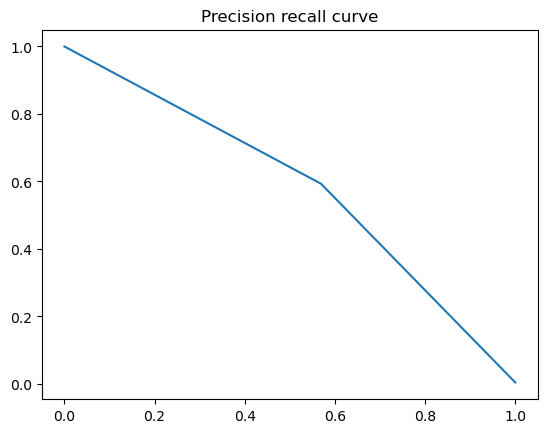

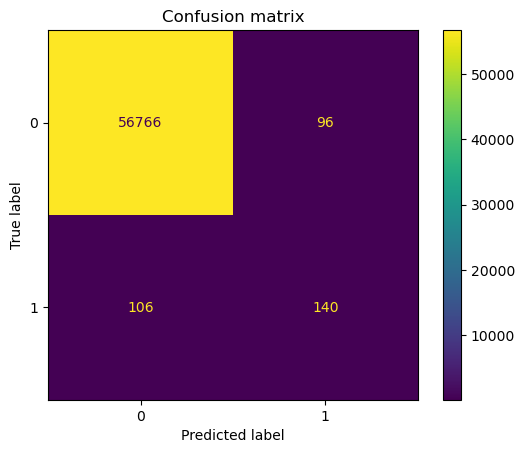

In [173]:
precision, recall, thresholds = precision_recall_curve(y_valid, pred_valid)
auc_precision_recall = auc(recall, precision)
f1 = f1_score(y_valid, pred_valid)
print(f'AUC-PR:    {auc_precision_recall}')
print(f'F1 score:  {f1}')

plt.plot(recall, precision)
plt.title('Precision recall curve')
plt.show()

cm = confusion_matrix(y_valid, pred_valid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()

#### Evaluation on whole dataset

AUC-PR:    0.4817993342731551
F1 score:  0.47308031774051185


/tmp/ipykernel_46644/646620168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_significant.loc[:, prediction_column] = (prob_density < EPSILON).astype(int)


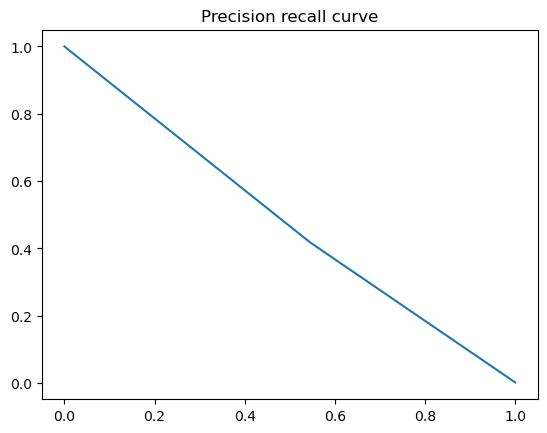

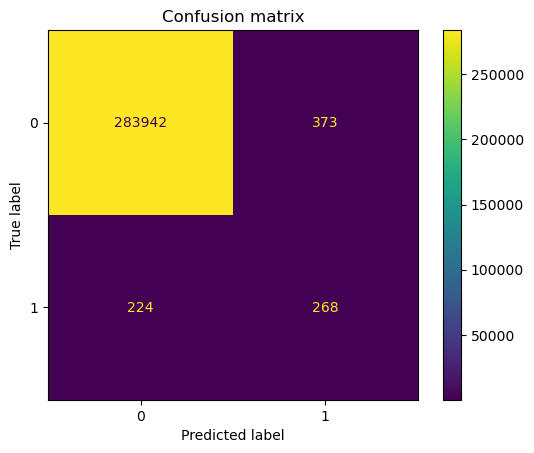

In [174]:
p = multivariate_normal(mean=np.mean(X_inliers_train, axis=0), cov=np.cov(X_inliers_train.T))
prob_density = p.pdf(X_train)
df_significant.loc[:, prediction_column] = (prob_density < EPSILON).astype(int)
evaluate_results(prediction_column)

### Isolation Forrest
- fast and accurate
- not need to scale features
- output is -1 for outliers and 1 for inliers -> transform to 1 and 0 by (x + 2) % 3
- pros is knowing contamination size
- evaluation: if contamination size not specified then generates many FP -> not reliable but for detecting fraud transactions it is not a big issue, if we specify contamination size then FP and TN almost the same and only 1/4 of FN revealed
- fit and predict took 4 minutes on whole dataset

In [175]:
prediction_column = 'Pred_ISF'

# ISF = IsolationForest(random_state=42, contamination=CONTAMINATION)
ISF = IsolationForest(n_estimators=1100, max_features=1.0, max_samples=1.0, bootstrap=False, random_state=42, contamination=CONTAMINATION)
prediction_raw = ISF.fit_predict(X_train)
df_significant.loc[:, prediction_column] = (prediction_raw + 2) % 3

/anaconda/envs/an_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/tmp/ipykernel_46644/4224693828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_significant.loc[:, prediction_column] = (prediction_raw + 2) % 3


AUC-PR:    0.37046292738363035
F1 score:  0.3699186991869919


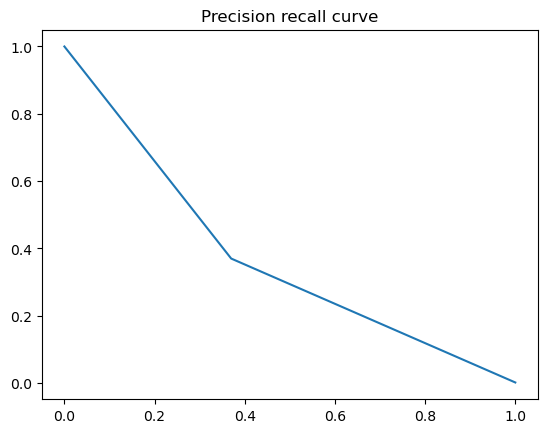

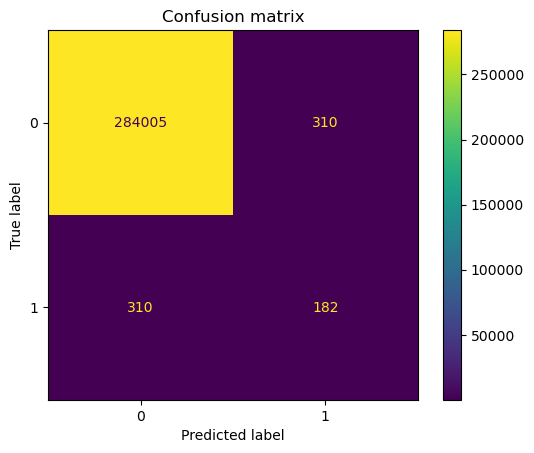

In [176]:
evaluate_results(prediction_column)

### Local Outlier Factor
- very slow computation without PCA transformation
- tried to PCA with 10 components and it was much faster, 
- knowing contamination size did not help to achieve better results
- PCA n_components = 10
    - n_neighbors 21 -> 3 min training
    - n_neighbors = 50 -> 4 min training
    - n_neighbors = 100 -> 5 min 48 s training (190 false negatives)
- PCA  n_components = 13
    - n_neighbors = 100 -> 13 min (69 false negatives)

In [177]:
prediction_column = 'Pred_LOF'

pca = PCA(n_components=10)
X_train_sc_pca = pca.fit_transform(X_train_sc)

LOF = LocalOutlierFactor(n_neighbors=100)
prediction_raw = LOF.fit_predict(X_train_sc_pca)

In [178]:
df_significant.loc[:, prediction_column] = (prediction_raw + 2) % 3
df_significant[(df_significant["Pred_LOF"] == 1) & (df_significant["Class"] == 1)]

/tmp/ipykernel_46644/1496286952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_significant.loc[:, prediction_column] = (prediction_raw + 2) % 3


V1        V2        V3        V4        V5        V6        V7  \
541    -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
4920   -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6329    1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   
6336    0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168 -0.812891   
6971   -3.499108  0.258555 -4.489558  4.853894 -6.974522  3.628382  5.431271   
...          ...       ...       ...       ...       ...       ...       ...   
274382 -5.766879 -8.402154  0.056543  6.950983  9.880564 -5.773192 -5.748879   
274475 -0.956390  2.361594 -3.171195  1.970759  0.474761 -1.902598 -0.055178   
276864 -1.374424  2.793185 -4.346572  2.400731 -1.688433  0.111136 -0.922038   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   

              V9       V10       V11  ...       V21       V24       V27  \
541    -2.770089 -2.772272  3.202033  ...  0.517232  0.320198  0.261145   
4920   -0.238253 -1.525412  2.032912  ... -0.294166 -0.087330  0.039566   
6329   -1.282858 -2.447469  2.101344  ... -0.379068 -1.632653 -0.010016   
6336   -2.214311 -5.134454  4.560720  ...  0.156617 -0.716522  0.530507   
6971   -0.775680 -1.987773  4.690396  ... -1.052368  0.170279  1.985913   
...          ...       ...       ...  ...       ...       ...       ...   
274382 -1.076274  2.688670 -1.475145  ...  0.880395  0.665346  0.073269   
274475 -1.745854 -2.516628  0.874052  ...  0.473211 -0.255650  0.683535   
276864 -2.027474 -4.390842  1.241958  ... -0.870779  0.368275  0.454982   
280143 -1.127396 -3.232153  2.858466  ...  0.370612 -0.081049  0.389152   
280149 -0.652250 -3.463891  1.794969  ...  0.751826  0.032070  0.385107   

             V28       V29  Class  Pred_GMM  Pred_MG_PDF  Pred_ISF  Pred_LOF  
541    -0.143276  1.155981      1       1.0            0         0         1  
4920   -0.153029  1.773886      1       1.0            0         0         1  
6329    0.146793  1.052894      1       1.0            0         0         1  
6336    0.404474  1.052537      1       1.0            0         0         1  
6971   -0.900452  6.143161      1       1.0            0         1         1  
...          ...       ...    ...       ...          ...       ...       ...  
274382  0.583799 -1.309464      1       1.0            0         0         1  
274475  0.443299 -1.197363      1       1.0            0         0         1  
276864  0.096711 -0.342795      1       1.0            0         0         1  
280143  0.186637 -1.357436      1       1.0            0         0         1  
280149  0.194361 -1.139443      1       1.0            0         0         1  

[147 rows x 27 columns]

AUC-PR:    0.15503879886470798
F1 score:  0.019512842636224863


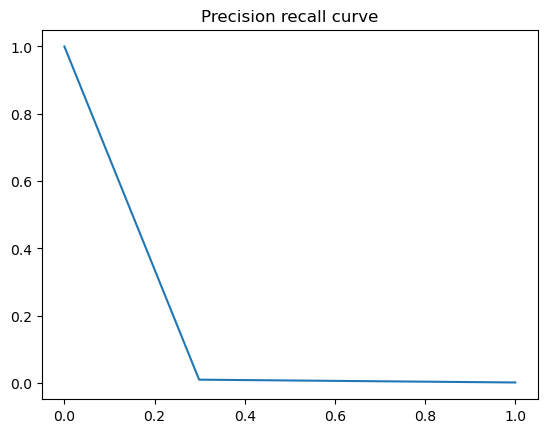

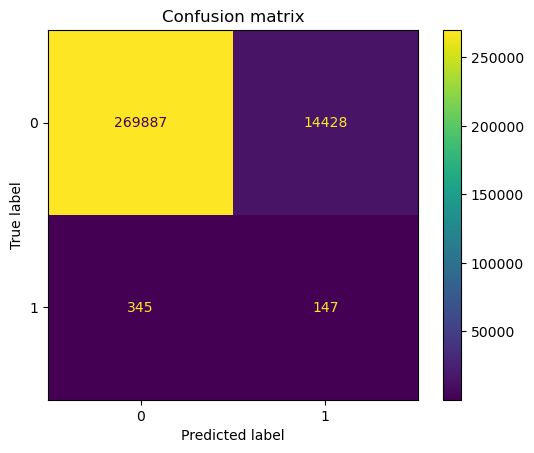

In [179]:
evaluate_results(prediction_column)

### Robust Covariance (Elliptic Envelope)

In [180]:
prediction_column = 'Pred_ELE'
SUPPORT_FRACTION=0.9948

ELE = EllipticEnvelope(support_fraction=SUPPORT_FRACTION, contamination=CONTAMINATION)
prediction_raw = ELE.fit_predict(X_train)
df_significant.loc[:, prediction_column] = (prediction_raw + 2) % 3

/tmp/ipykernel_46644/563474627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_significant.loc[:, prediction_column] = (prediction_raw + 2) % 3


AUC-PR:    0.8009850544632121
F1 score:  0.8008130081300813


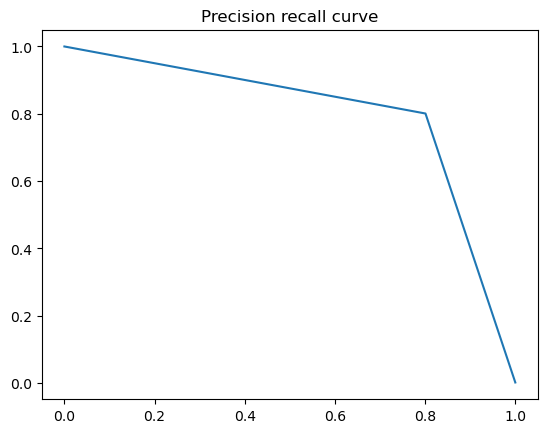

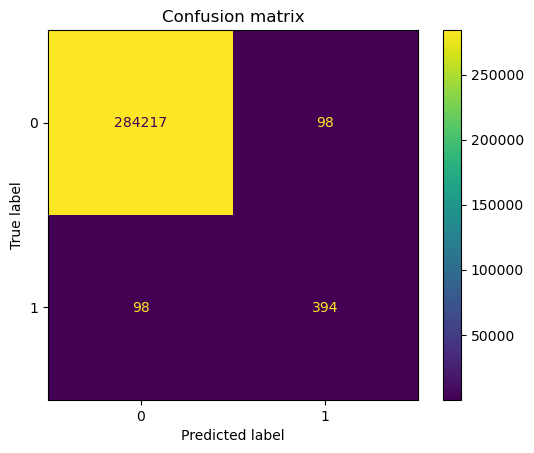

In [181]:
evaluate_results(prediction_column)

## 4.  Evaluation & Model Comparison 

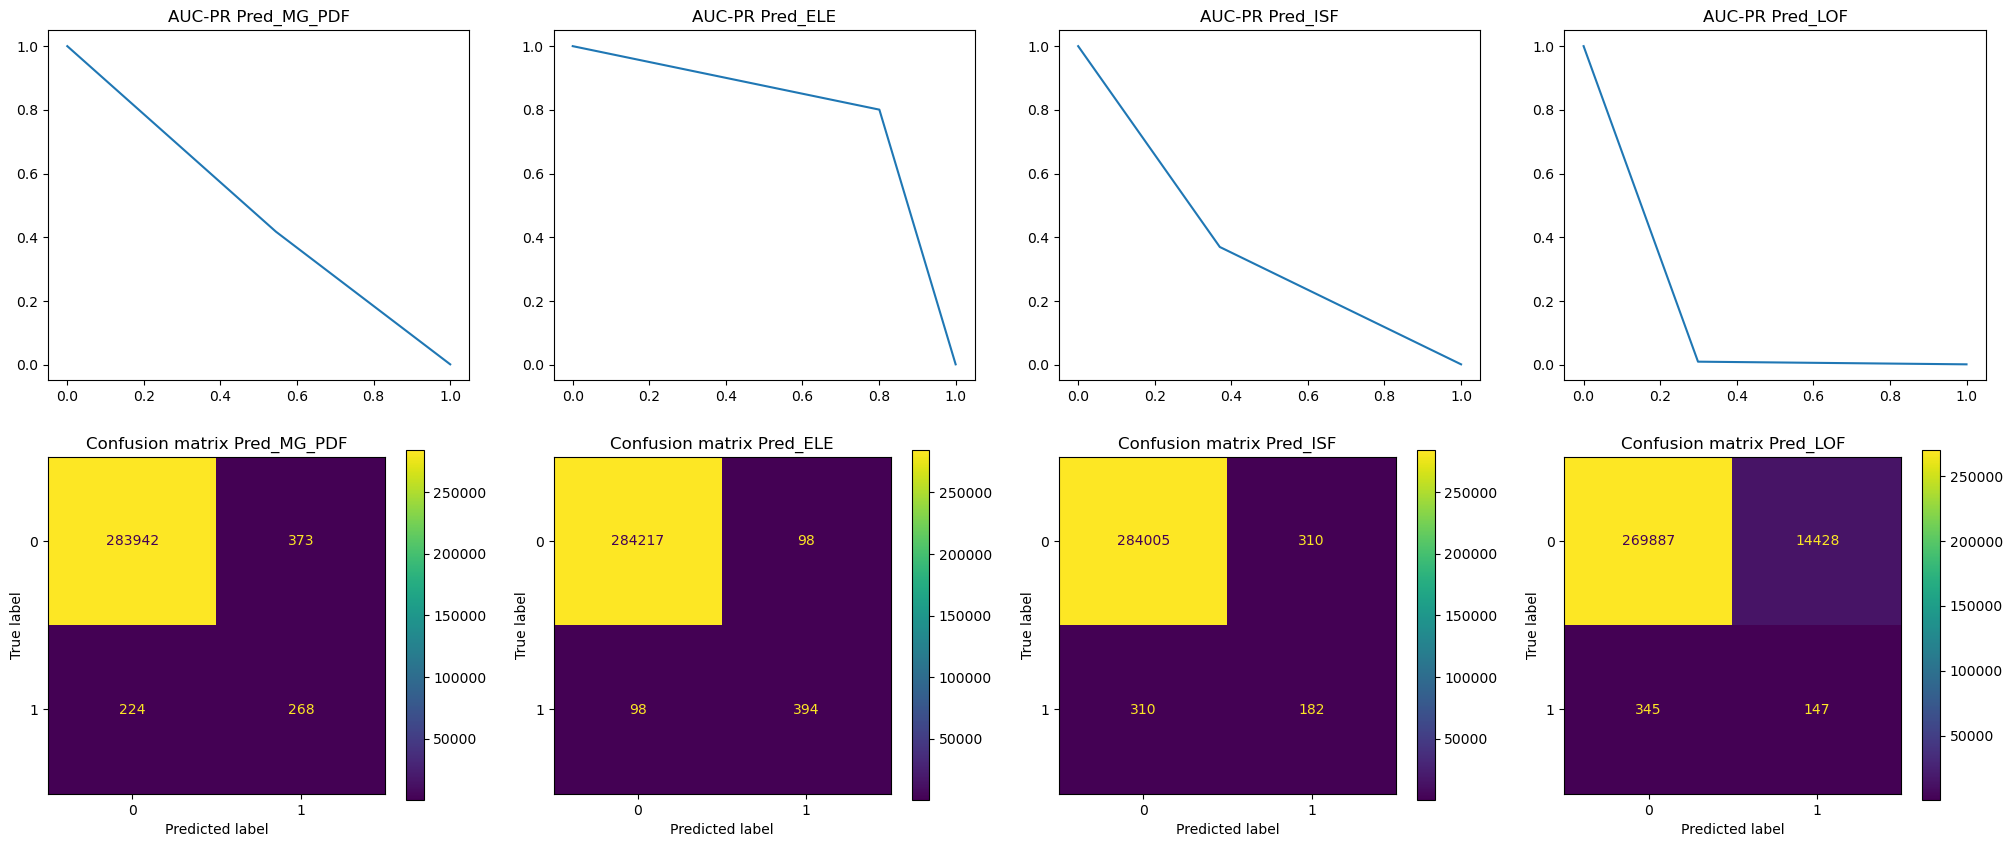

In [182]:
prediction_columns = ['Pred_MG_PDF', 'Pred_ELE', 'Pred_ISF', 'Pred_LOF']
show_results_all(prediction_columns)

Text(0.5, 1.0, 'Metrics results')

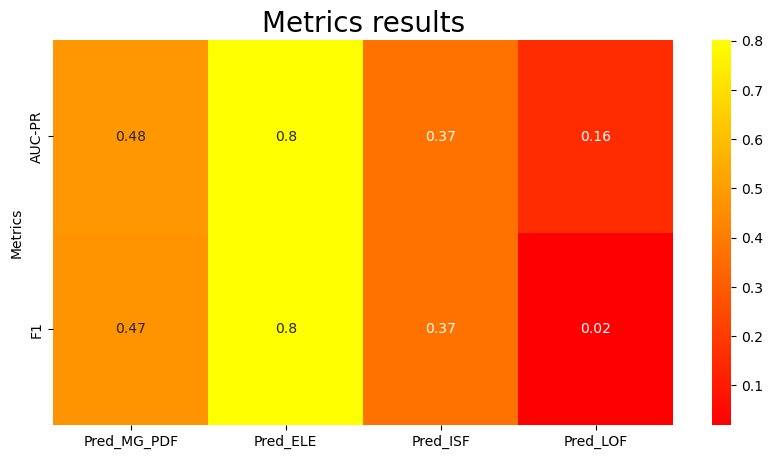

In [183]:
final_metrics_table = pd.DataFrame(evaluate_metrics_all(prediction_columns), columns=prediction_columns)
final_metrics_table["Metrics"] = ["AUC-PR", "F1"]
final_metrics_table.set_index("Metrics", inplace=True)
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(final_metrics_table, annot=True, cmap='autumn')
plt.title("Metrics results", fontsize=20)